# Командная работа
Выполнили Воробьев Артем и Муфтахутдинов Алмаз

# Подключение библиотек📚

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering

### Читаем наш Датасет

In [3]:
df = pd.read_csv('student_performance_updated_1000.csv')

# Описание предметной области

In [4]:
df.head(10)

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


- StudentId - уникальный индентификатор студента
- Name - Имя студента
- Gender - пол студента
- AttenndanceRate - рейтинг посещаемости
- StudyHoursPerWeek - количество часов обучения в неделю
- PreviousGrade - предварительная оценка
- ExtracurricularActivities - внеклассные занятия
- ParentalSupport - родительская поддержка
- FinalGrade - финальная оценка
- Study Hours - часы обучения
- Attendance (%)  - посещаемость

Большинство атрибутов имеют тип данных: 'float64' и некоторые объекты: 'object'.
В нашем датасете имеется 1000 записей. На каждый атрибут отсутствует в среднем 35 записей. Не такое большое количество пропусков, но надо выявить значимость атрибута и понять, стоит их удалять или нет.

In [6]:
df.duplicated().sum()

np.int64(0)

Дубликаты отсутствуют. Это очень хорошо✅

In [7]:
df.isnull().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

Заменим медианой такие атрибуты как рейтинг посещаемости

In [33]:
# Создаем копию
df_clean = df.copy()

# 1. Категориальные - перезаписываем колонки (без inplace!)
for col in ['Gender', 'ParentalSupport', 'Online Classes Taken']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 2. Числовые - тоже без inplace
numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
                'ExtracurricularActivities', 'FinalGrade', 'Study Hours', 
                'Attendance (%)']

for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 3. StudentID - удаляем строки с пропусками
df_clean = df_clean.dropna(subset=['StudentID'])

# 4. Name
df_clean['Name'] = df_clean['Name'].fillna('Unknown')

# ПРОВЕРКА
print("Проверка пропусков:")
print(df_clean.isnull().sum())
print(f"\nВсего пропусков: {df_clean.isnull().sum().sum()}")
print(f"\nРазмер датасета: {len(df_clean)} строк")

Проверка пропусков:
StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study Hours                  0
Attendance (%)               0
Online Classes Taken         0
dtype: int64

Всего пропусков: 0

Размер датасета: 960 строк


C:\Users\qzwxe\AppData\Local\Temp\ipykernel_6756\705745512.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       960 non-null    object 
 2   Gender                     960 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          960 non-null    float64
 5   PreviousGrade              960 non-null    float64
 6   ExtracurricularActivities  960 non-null    float64
 7   ParentalSupport            960 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                960 non-null    float64
 10  Attendance (%)             960 non-null    float64
 11  Online Classes Taken       960 non-null    bool   
dtypes: bool(1), float64(8), object(3)
memory usage: 90.9+ KB


In [35]:
df_final = df_clean.copy()
df_final = df_final.drop(columns=['Study Hours', 'Attendance (%)'])

Пустые данные удалены

In [36]:
print("=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df.describe())

print("\n=== РАСПРЕДЕЛЕНИЕ FINALGRADE ===")
print(f"Средняя оценка: {df['FinalGrade'].mean():.2f}")
print(f"Медиана: {df['FinalGrade'].median():.2f}")
print(f"Стандартное отклонение: {df['FinalGrade'].std():.2f}")
print(f"Мин: {df['FinalGrade'].min():.2f}, Макс: {df['FinalGrade'].max():.2f}")

=== ОСНОВНАЯ СТАТИСТИКА ===
         StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   960.000000     1000.000000        1000.000000    1000.000000   
mean   5416.019792       85.610000          17.649000      77.612000   
std    2653.748319        7.200399           6.113688       9.840238   
min       1.000000       70.000000           8.000000      60.000000   
25%    3113.500000       82.000000          12.000000      70.000000   
50%    5396.500000       88.000000          18.000000      78.000000   
75%    7754.750000       91.000000          22.000000      86.000000   
max    9998.000000       95.000000          30.000000      90.000000   

       ExtracurricularActivities   FinalGrade  Study Hours  Attendance (%)  
count                 957.000000  1000.000000  1000.000000     1000.000000  
mean                    1.520376    80.029000     2.409200       77.197000  
std                     1.046439     9.301649     1.600749       18.899613  
min            

По статистике заметны выбросы и аномалии

Исправим выбросы в колонке

In [37]:
print("=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df_final.describe())

print("\n=== РАСПРЕДЕЛЕНИЕ FINALGRADE ===")
print(f"Средняя оценка: {df['FinalGrade'].mean():.2f}")
print(f"Медиана: {df['FinalGrade'].median():.2f}")
print(f"Стандартное отклонение: {df['FinalGrade'].std():.2f}")
print(f"Мин: {df['FinalGrade'].min():.2f}, Макс: {df['FinalGrade'].max():.2f}")

=== ОСНОВНАЯ СТАТИСТИКА ===
         StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   960.000000      960.000000         960.000000     960.000000   
mean   5416.019792       85.645833          17.593750      77.744792   
std    2653.748319        7.132851           6.092916       9.808834   
min       1.000000       70.000000           8.000000      60.000000   
25%    3113.500000       82.000000          12.000000      70.000000   
50%    5396.500000       88.000000          18.000000      78.000000   
75%    7754.750000       91.000000          22.000000      86.000000   
max    9998.000000       95.000000          30.000000      90.000000   

       ExtracurricularActivities  FinalGrade  
count                 960.000000   960.00000  
mean                    1.495833    80.12500  
std                     1.029281     9.32313  
min                     0.000000    62.00000  
25%                     1.000000    72.00000  
50%                     1.000000    80.00

Теперь у нас хороший датасет. Можем продолжить с ним работать

<Figure size 1200x800 with 0 Axes>

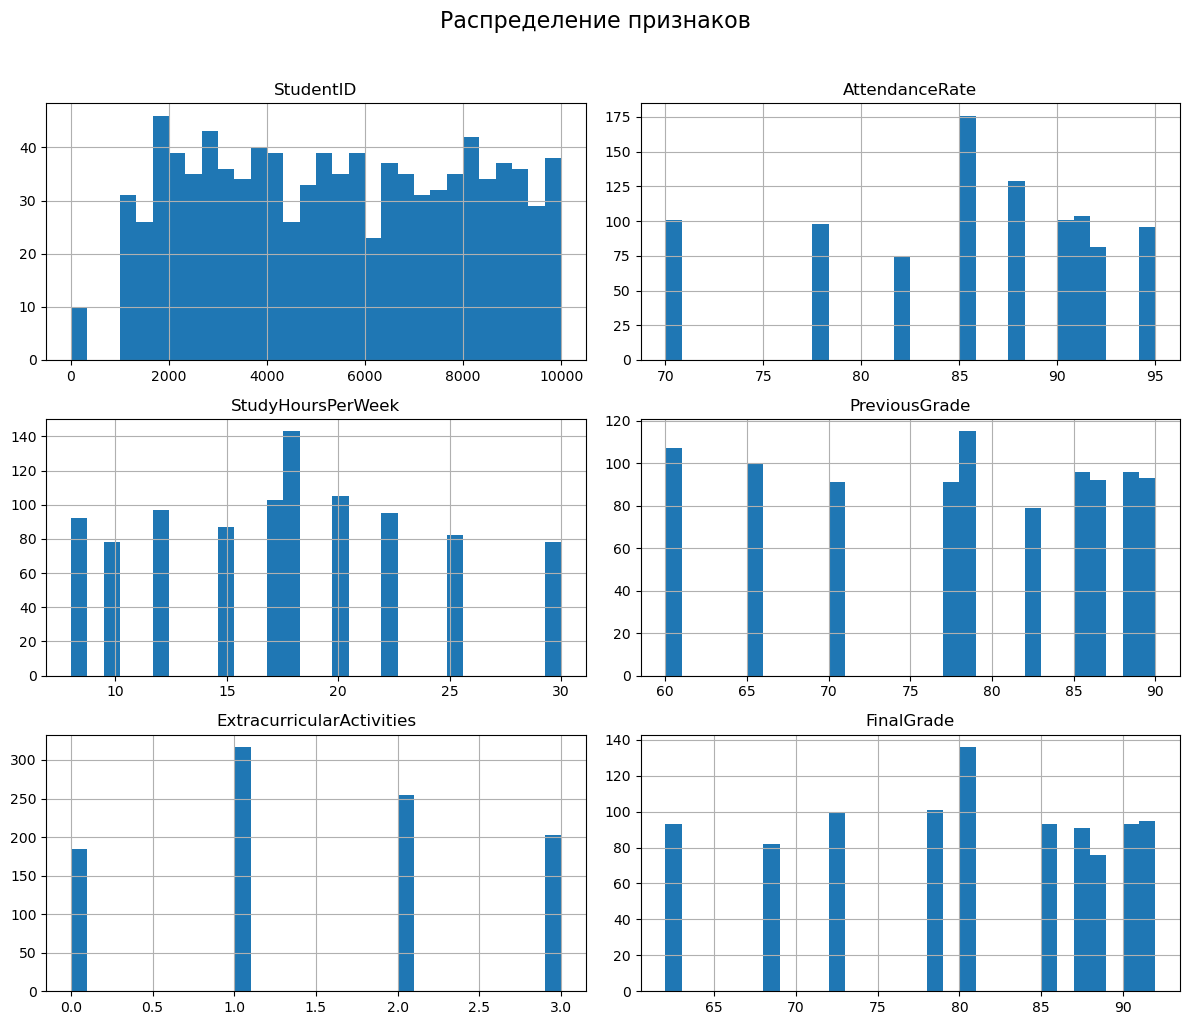

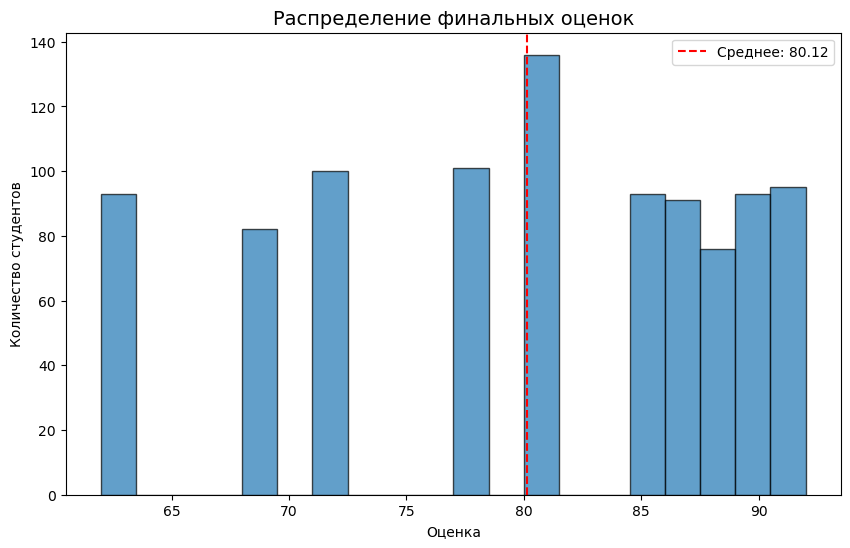

In [45]:
# ===== ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ =====
plt.figure(figsize=(12, 8))
df_final.hist(bins=30, figsize=(12, 10))
plt.suptitle('Распределение признаков', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# ===== ГРАФИК FINALGRADE =====
plt.figure(figsize=(10, 6))
plt.hist(df_final['FinalGrade'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение финальных оценок', fontsize=14)
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.axvline(df_final['FinalGrade'].mean(), color='red', linestyle='--', label=f'Среднее: {df_final["FinalGrade"].mean():.2f}')
plt.legend()
plt.show()

Анализ гистограмм показал, что все переменные имеют дискретный характер.
Это объясняет отсутствие линейных корреляций. Датасет, вероятно, является
синтетическим.

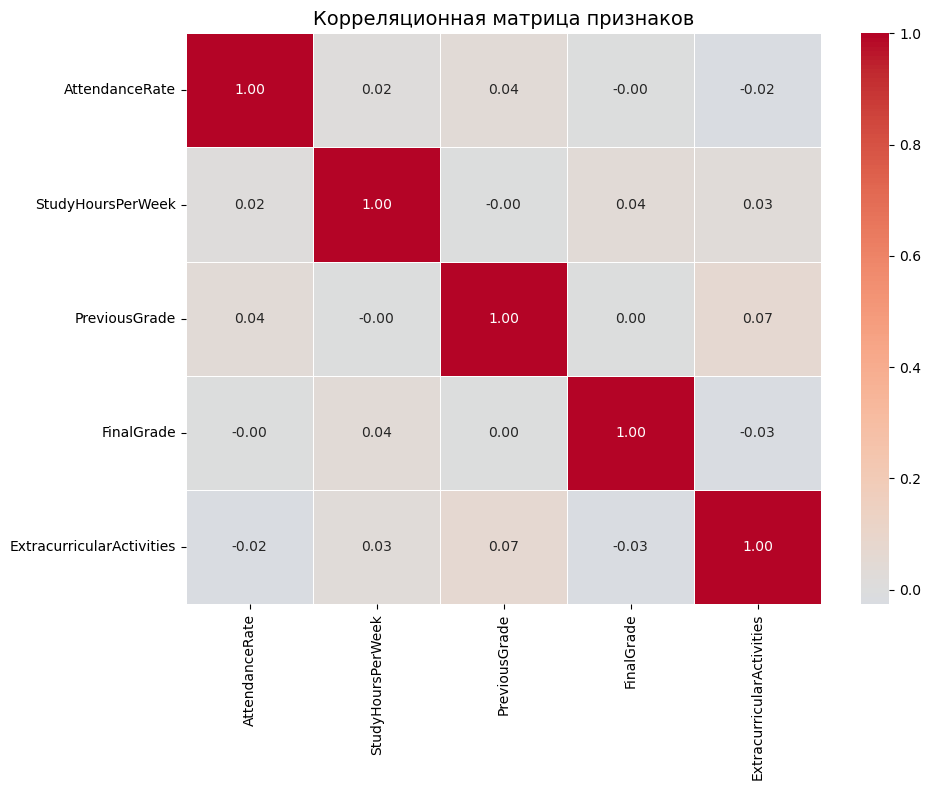


=== КОРРЕЛЯЦИЯ ПРИЗНАКОВ С FINALGRADE ===
FinalGrade                   1.000000
StudyHoursPerWeek            0.035038
PreviousGrade                0.002060
AttendanceRate              -0.001654
ExtracurricularActivities   -0.025808
Name: FinalGrade, dtype: float64


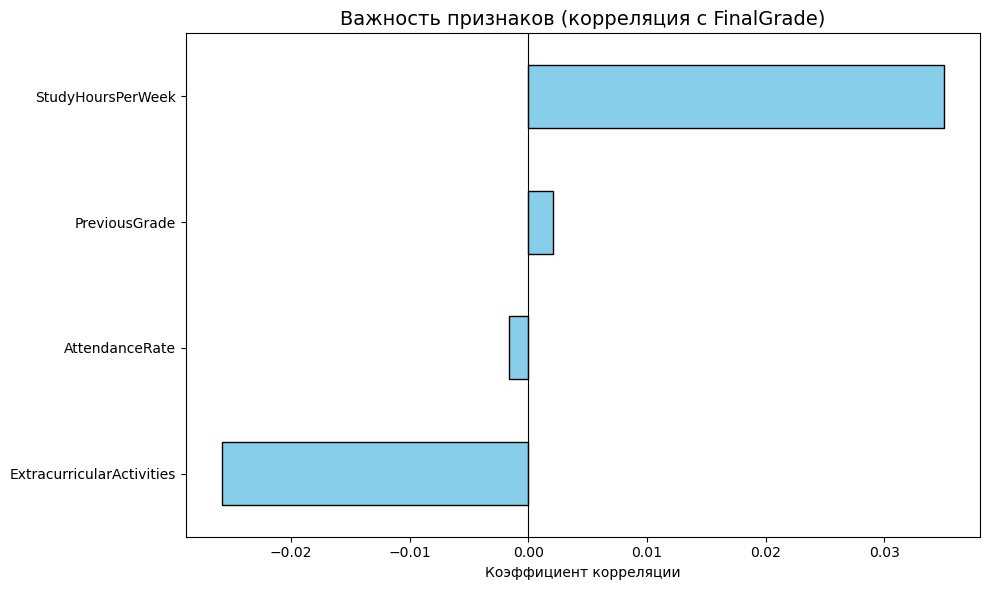


=== ТОП КОРРЕЛЯЦИЙ ===

Сильные корреляции между признаками:
PreviousGrade ↔ ExtracurricularActivities: 0.066
AttendanceRate ↔ PreviousGrade: 0.037
StudyHoursPerWeek ↔ ExtracurricularActivities: 0.032
AttendanceRate ↔ ExtracurricularActivities: -0.024
AttendanceRate ↔ StudyHoursPerWeek: 0.017


In [39]:
plt.figure(figsize=(10, 8))

correlation_matrix = df_final[['AttendanceRate', 'StudyHoursPerWeek', 
                                'PreviousGrade', 'FinalGrade', 
                                'ExtracurricularActivities']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков', fontsize=14)
plt.tight_layout()
plt.show()

print("\n=== КОРРЕЛЯЦИЯ ПРИЗНАКОВ С FINALGRADE ===")

numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
                'ExtracurricularActivities']

correlations = df_final[numeric_cols + ['FinalGrade']].corr()['FinalGrade'].sort_values(ascending=False)

print(correlations)

plt.figure(figsize=(10, 6))
correlations.drop('FinalGrade').plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Важность признаков (корреляция с FinalGrade)', fontsize=14)
plt.xlabel('Коэффициент корреляции')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== ТОП КОРРЕЛЯЦИЙ ===")
corr_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr = df_final[col1].corr(df_final[col2])
        corr_pairs.append((col1, col2, corr))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nСильные корреляции между признаками:")
for col1, col2, corr in corr_pairs[:5]:
    print(f"{col1} ↔ {col2}: {corr:.3f}")

Корреляционный анализ показал отсутствие линейных зависимостей между признаками. Это может означать, что:
- Датасет синтетический
- Зависимости нелинейные
- Признаки действуют только в комбинации